## **Проект для Яндекс.Практикум**
* **`Презентация:`** https://disk.yandex.ru/d/EPpR1RBAnrTylA
* **`Дашборд:`** https://public.tableau.com/app/profile/alesso4487/viz/FinalProject_16565931282640/BanksDashboard


## Описание проекта

Задача:
    
Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов.
* Проведите исследовательский анализ данных,
* Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
* Сформулируйте и проверьте статистические гипотезы.

Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.


**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
* `userid` — идентификатор пользователя,
* `score` — баллы кредитного скоринга,
* `City` — город,
* `Gender` — пол,
* `Age` — возраст,
* `Objects` — количество объектов в собственности,
* `Balance` — баланс на счёте,
* `Products` — количество продуктов, которыми пользуется клиент,
* `CreditCard` — есть ли кредитная карта,
* `Loyalty` — активный клиент,
* `estimated_salary` — заработная плата клиента,
* `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно ***обязательно*** в формате pdf.


## Загрузка данных, первичный анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from scipy import stats as st
from scipy.stats import shapiro
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/bank_dataset.csv")
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dfs_dict = {'df':df}
for name_, df_ in dfs_dict.items():
    print('='*60)
    print('\033[1m'+f'INFO {name_}'+'\033[0m', end='\n\n')
    print(df_.info(), end='\n\n')
    print('='*60)
    print('\033[1m'+f'Initial Duplicates in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    if df_.duplicated().sum() > 0:
        df_.drop_duplicates(inplace=True)
        print('\033[1m'+f'Final Duplicates  in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    print('='*60)
    df_.columns = df_.columns.str.lower().str.replace(' ', '_')
    print('\033[1m'+f'Columns in {name_}:'+'\033[0m\n', df_.columns)
    print('='*60)
    print('\033[1m'+f'Nulls and notNAs in {name_}:'+'\033[0m\n')
    missing_data = pd.DataFrame({'nulls':df_.isna().sum()})
    missing_data['null_rate'] = df_.isna().mean().map(lambda x: '{:.2%}'.format(x))
    missing_data['notna'] = df_.notna().sum()
    missing_data['notna_rate'] = df_.notna().mean().map(lambda x: '{:.2%}'.format(x))
    
    display(missing_data)
    
    print('='*60)
    print('\033[1m'+f'Number of properties in {name_}:'+'\033[0m\n', len(df.columns))
    print('='*60)
    display(df_.head(3))


INFO df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Initial Duplicates in df:  0

Columns in df:
 Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'lo

,nulls,null_rate,notna,notna_rate
userid,0,0.00%,10000,100.00%
score,0,0.00%,10000,100.00%
city,0,0.00%,10000,100.00%
gender,0,0.00%,10000,100.00%
age,0,0.00%,10000,100.00%
objects,0,0.00%,10000,100.00%
balance,3617,36.17%,6383,63.83%
products,0,0.00%,10000,100.00%
creditcard,0,0.00%,10000,100.00%
loyalty,0,0.00%,10000,100.00%


Number of properties in df:
 12


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1


### **Вывод**
* Данные представлены в одном файле
* Данные заполнены все на 100%, кроме колонки "баланс счета". В данной колонке отсутствуют записи в кол-ве 3617, что составляет 36,17%, то есть уровень заполненности составляет 63,83%
* Дубликаты отсутствуют
* Названия колонок преобразованы в соответствии с требованиями ***snake_style***
* В данных присутсвуют признаки в кол-ве 12 в виде целых и действительных чисел, а также в виде строковых переменных

## Предобработка данных

In [4]:
print('Ср. и медиана скоринга для неизвестных балансов:\n', df.query('balance.isna()', engine='python').score.agg(['mean','median']), end = '\n\n')
print('Ср. и медиана скоринга для известных балансов:\n', df.query('balance.notna()', engine='python').score.agg(['mean','median']), end = '\n\n')

Ср. и медиана скоринга для неизвестных балансов:
 mean      649.452861
median    651.000000
Name: score, dtype: float64

Ср. и медиана скоринга для известных балансов:
 mean      651.138493
median    652.000000
Name: score, dtype: float64



Неизвсестно достоверно, включены ли данные о клиентах с незаполненными ячейками баланса в скоринг или нет. Возможно, что данные о балансе будут заполняться позднее, и так как скоринг-балл уже присутствует а также для того, чтобы не искажать показатели баланса, оставим этот столбец нетронутым

Тем не менее, взглянем на профили клиентов, у которых нет значений баланса

In [5]:
df_nb = df.query('balance.isna()', engine='python').drop('userid', axis=1)
display(df_nb.head())
df_nb.describe()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0


,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
for i in df_nb.city.unique():
    print(f'Кол-во пропусков в балансе в г.{i} =', len(df_nb.query(f'city == @i', engine='python')))

Кол-во пропусков в балансе в г.Ярославль = 2418
Кол-во пропусков в балансе в г.Рыбинск = 1199


In [7]:
for i in df_nb.gender.unique():
    print('пол:', i, '|', 'Кол-во пропусков: ', len(df_nb.query(f'gender == @i', engine='python')))

пол: Ж | Кол-во пропусков:  1654
пол: М | Кол-во пропусков:  1963


### **Вывод**

* Среднее и медиана `скоринга для неизвестных балансов` находятся довольно близко: 649 и 651 соответственно
* Та же картина и для известных балансов: 651 и 652
* Как следствие, `общий сокринг` так же близок в среднем и медиане: 649 и 651 соответственно
* Среднее и медиана `кол-ва объектов` – 5, минимум – 0, максимум – 10
* Для `продуктов пользования` среднее – 2, медиана 1,78, минимум – 1, максимум – 4
* Для `оценочной зарплаты` среднее и медиана различаются немного и равны 98,618р и 98,983р соответственно. Минимум – 90р, максимум – 199992р




* Для того, чтобы не искажать показатели баланса, пропуски оставлены без изменения
* Распределение женщин и мужчин в категории отсутствующих данных о балансе отличается незначительно
* В Ростове Великом нет пропусков в балансе, в то время как в Ярославе их 2418 - более чем в два раза больше, чем в Рыбинске (1199)

## Исследовательский анализ

### Изучение параметров клиентов по оттоку

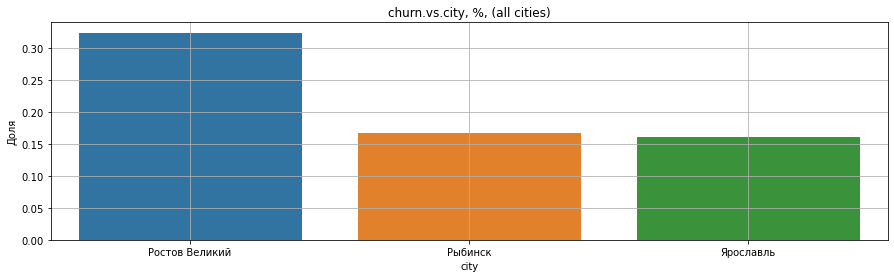

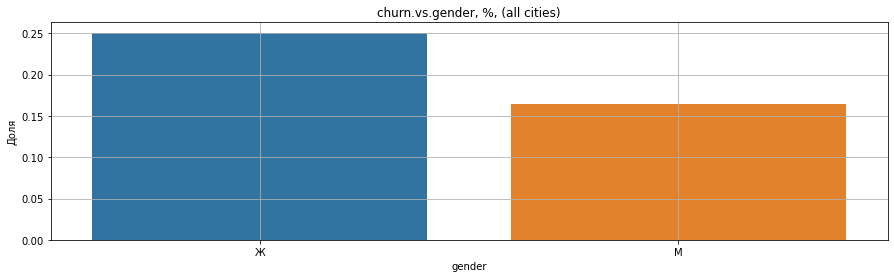

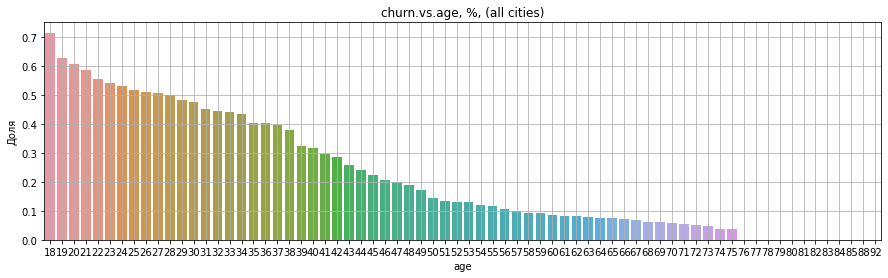

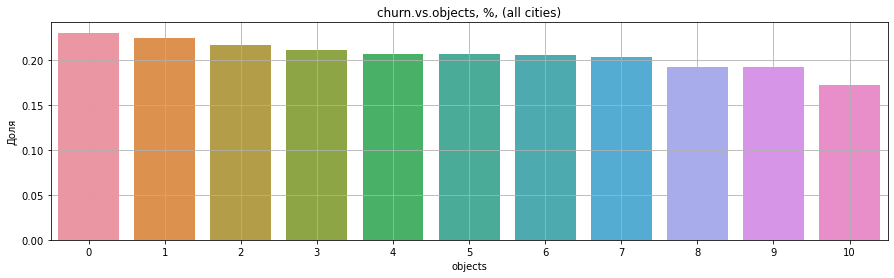

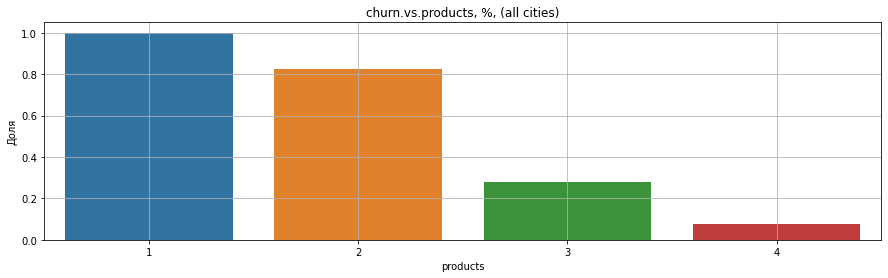

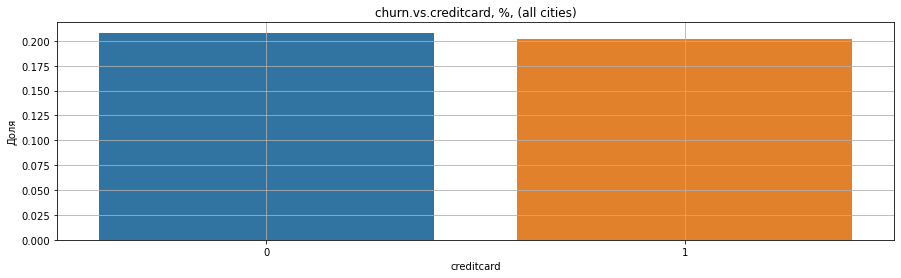

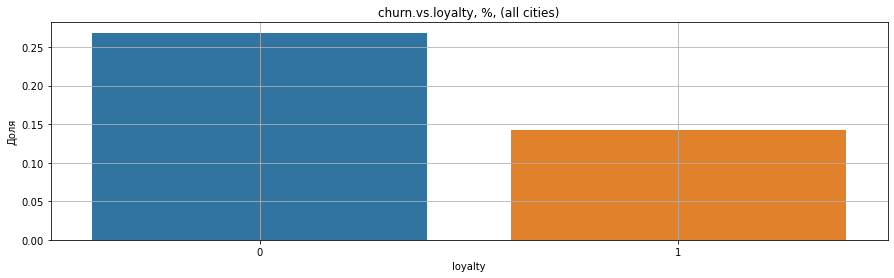

In [8]:
# Отток клиентов по параметрам (%)
dfc = df.drop('userid', axis=1)
for i in ['city', 'gender', 'age', 'objects', 'products', 'creditcard', 'loyalty']:
    df_ = dfc.groupby(i).churn.mean()
    plt.rcParams["figure.figsize"] = (15, 4)
    sns.barplot(df_.to_frame().index, df_.to_frame().sort_values('churn', ascending=False).churn)
    plt.xticks(rotation=0) 
    plt.xlabel(i)
    plt.ylabel('Доля')
    plt.title('churn.vs.'+ i + ", %, " + '(all cities)')
    plt.grid()
    plt.show()

Рассмотрим ту же картину с разбиением по городам:

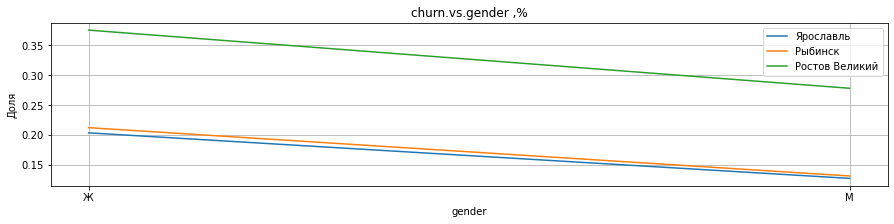

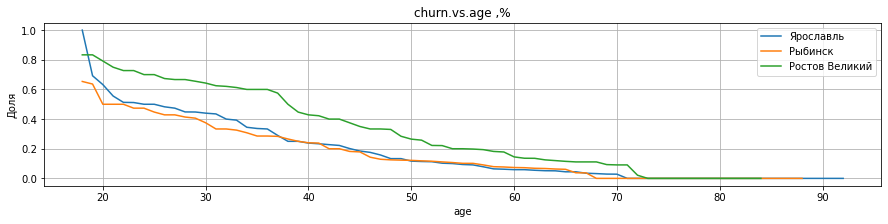

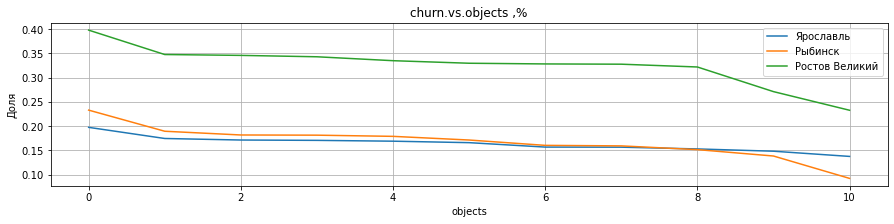

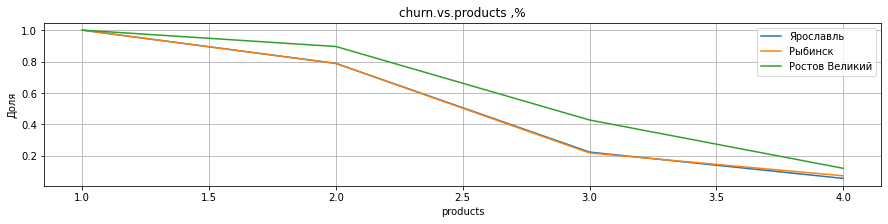

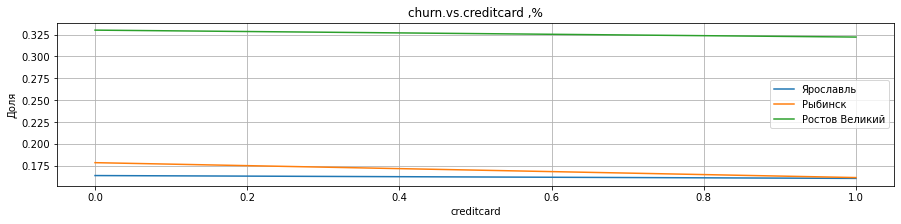

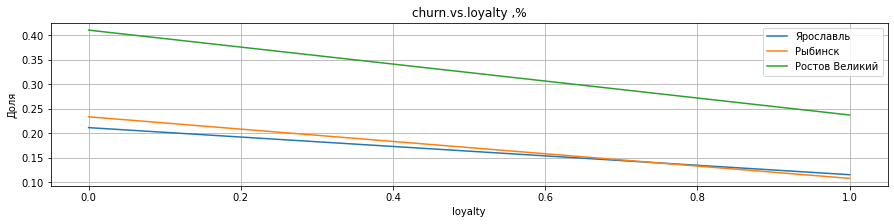

In [9]:
for i in ['gender', 'age', 'objects', 'products', 'creditcard', 'loyalty']:
    for c in dfc.city.unique():
        df_ = dfc.query('city == @c').groupby(i).churn.mean()
        plt.rcParams["figure.figsize"] = (15, 3)
        plt.plot(df_.to_frame().index, df_.to_frame().sort_values('churn', ascending=False).churn, label=c)
        plt.xticks(rotation=0) 
        plt.xlabel(i)
        plt.ylabel('Доля')
        plt.legend()
        plt.title('churn.vs.'+ i + " ,%")
        plt.grid()
    plt.show()

Обратим внимание на клиентов с одним продуктом

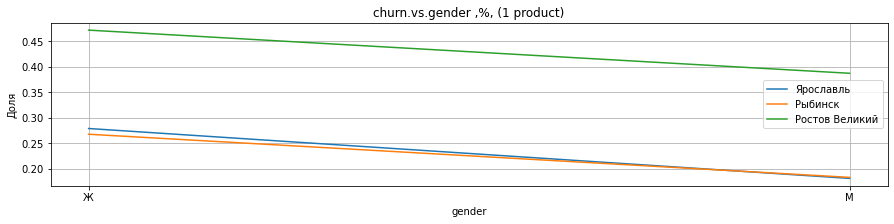

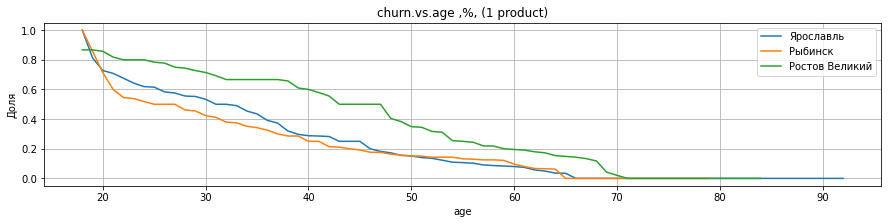

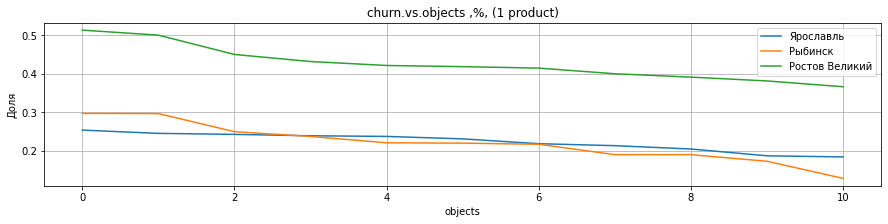

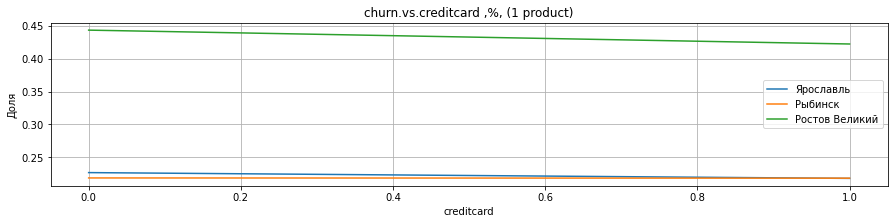

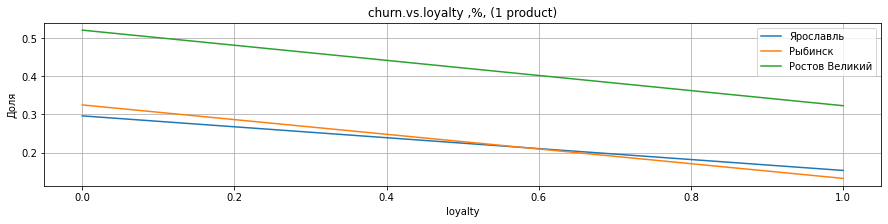

In [10]:
for i in ['gender', 'age', 'objects', 'creditcard', 'loyalty']:
    for c in dfc.city.unique():
        df_ = dfc.query('city == @c & products == 1').groupby(i).churn.mean()
        plt.rcParams["figure.figsize"] = (15, 3)
        plt.plot(df_.to_frame().index, df_.to_frame().sort_values('churn', ascending=False).churn, label=c)
        plt.xticks(rotation=0) 
        plt.xlabel(i)
        plt.ylabel('Доля')
        plt.legend()
        plt.title('churn.vs.'+ i + " ,%, " + '(1 product)')
        plt.grid()
    plt.show()

Картина аналогична для расчета, учитывающего все продукты

Рассмотрим средний уровень оттока по параметрам

In [11]:
churn_mean = dfc.groupby('churn').agg({'mean'}).T  # среднее значение признаков с группировкой по оттоку
churn_mean.columns = ['in','gone']
churn_mean = churn_mean.reset_index().drop('level_1', axis=1)
churn_mean.columns = ['property', 'in', 'gone']
churn_mean['in%'] = (churn_mean['in'] /  (churn_mean['in'] + churn_mean.gone)).map(lambda x: '{:.2%}'.format(x))
churn_mean['gone%'] = (churn_mean.gone /  (churn_mean['in'] + churn_mean.gone)).map(lambda x: '{:.2%}'.format(x))
churn_mean

,property,in,gone,in%,gone%
0,score,651.853196,645.351497,50.25%,49.75%
1,age,37.408389,44.837997,45.48%,54.52%
2,objects,5.033279,4.932744,50.50%,49.50%
3,balance,119535.864270,120746.971132,49.75%,50.25%
4,products,1.544267,1.475209,51.14%,48.86%
5,creditcard,0.707146,0.699067,50.29%,49.71%
6,loyalty,0.554565,0.360825,60.58%,39.42%
7,estimated_salary,99738.391772,101465.677531,49.57%,50.43%


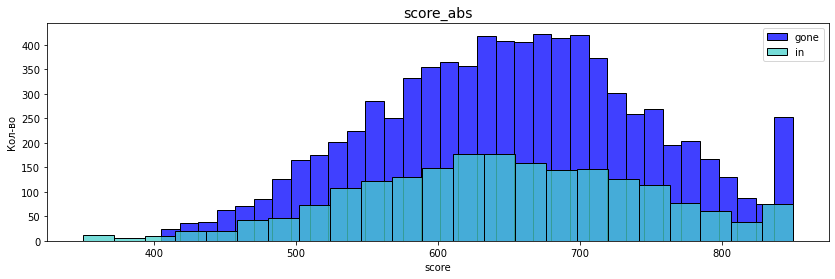

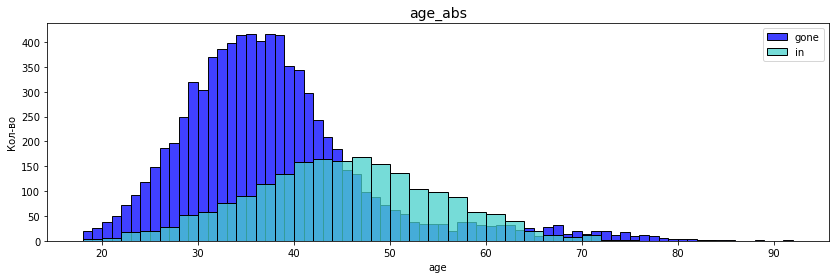

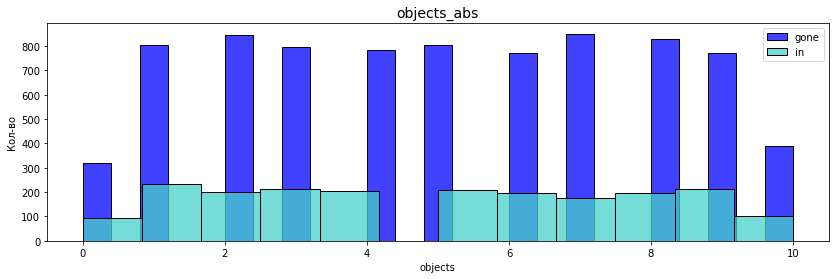

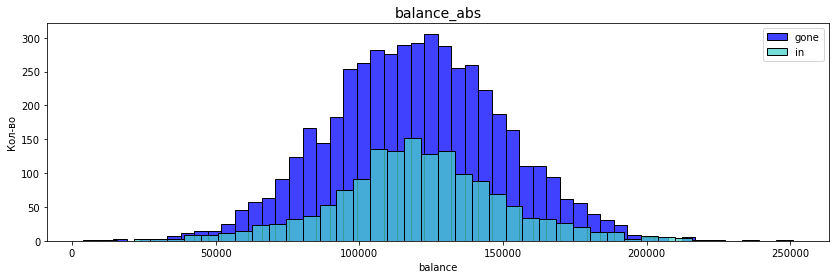

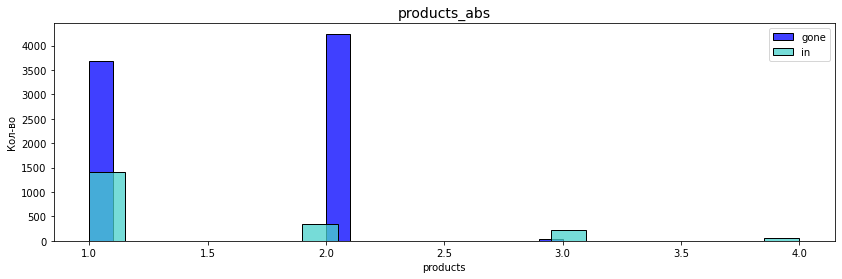

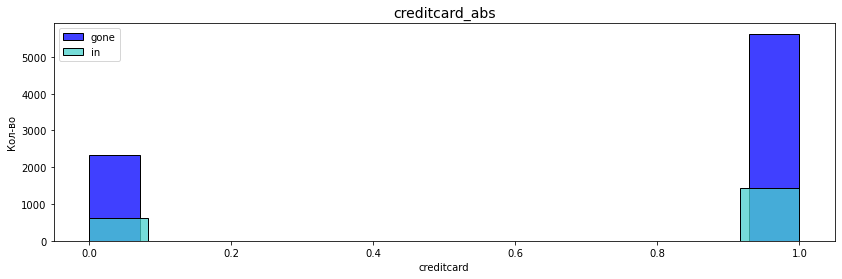

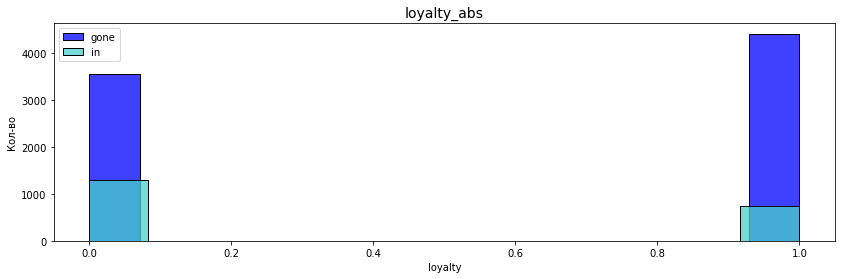

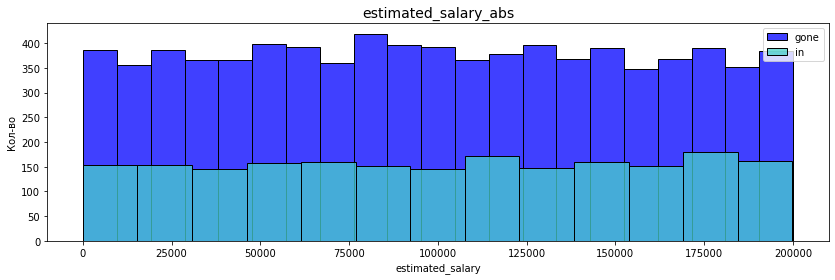

In [14]:
# Отток клиентов по параметрам (абсолютные величины)
for prop in churn_mean.property:
    fig = plt.figure(figsize=(14,4))
    sns.histplot(df.query('churn == 0')[prop], label='gone', color="Blue")
    sns.histplot(df.query('churn == 1')[prop], label='in', color="MediumTurquoise")
    plt.title(prop+'_abs', fontsize=14)
    plt.ylabel('Кол-во')
    plt.legend()
#     plt.grid()
    plt.show()

интересный всплеск скоринга выше 840 баллов

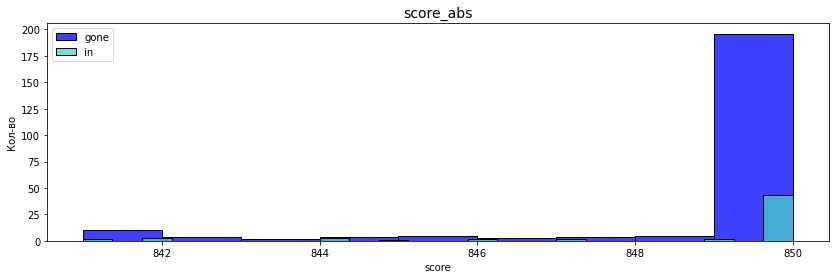

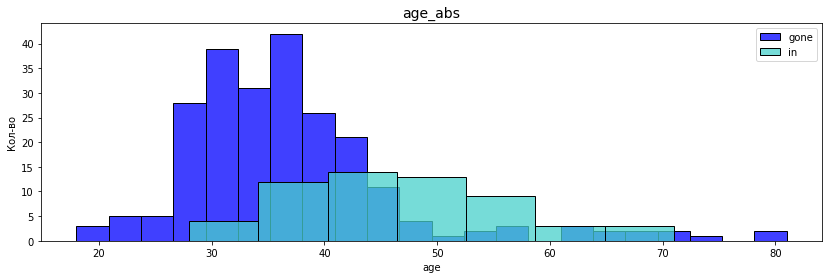

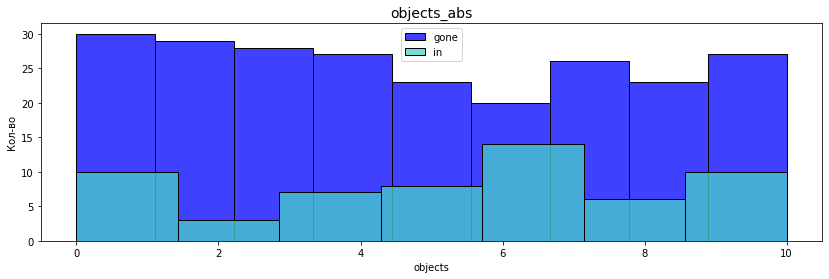

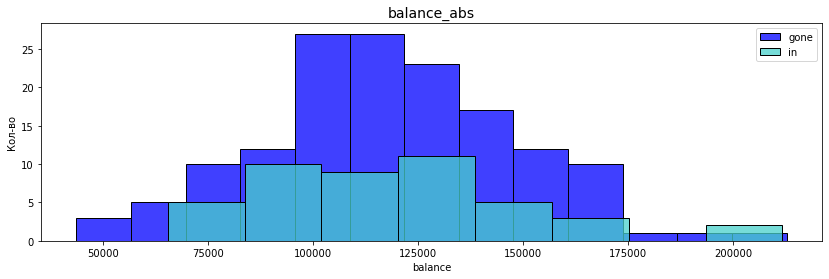

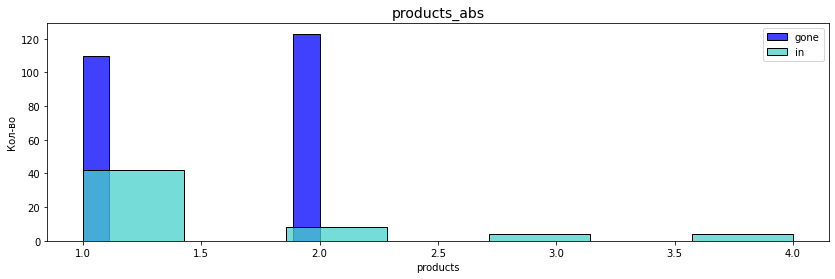

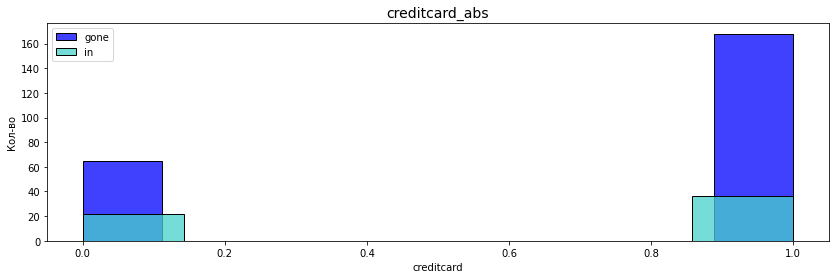

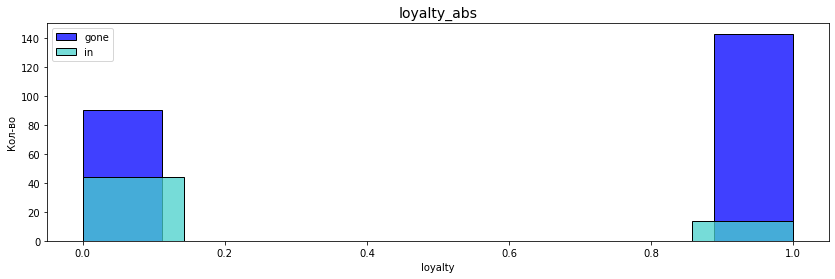

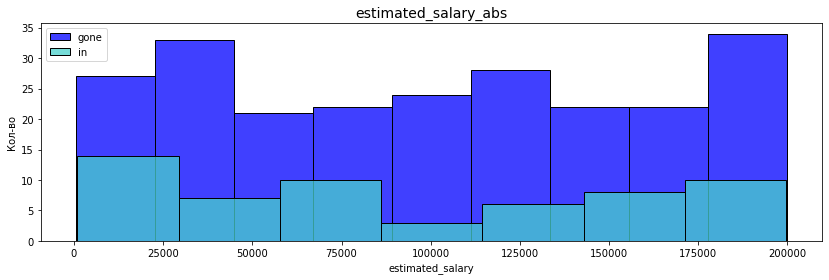

In [15]:
for prop in churn_mean.property:
    fig = plt.figure(figsize=(14,4))
    sns.histplot(df.query('churn == 0 & score > 840')[prop], label='gone', color="Blue")
    sns.histplot(df.query('churn == 1 & score > 840')[prop], label='in', color="MediumTurquoise")
    plt.title(prop+'_abs', fontsize=14)
    plt.ylabel('Кол-во')
    plt.legend()
#     plt.grid()
    plt.show()

In [16]:
len(df.query('churn == 0 & score > 840'))

233

Картина для скоринга выше 840 соответствует общей с поправкой на дребезг при низких объемах

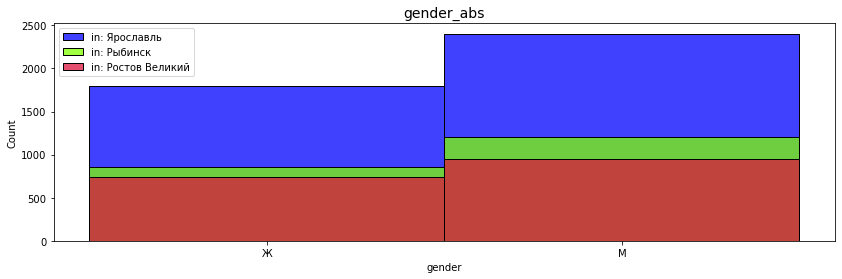

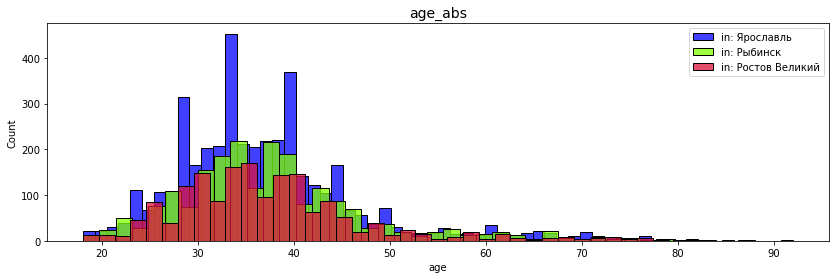

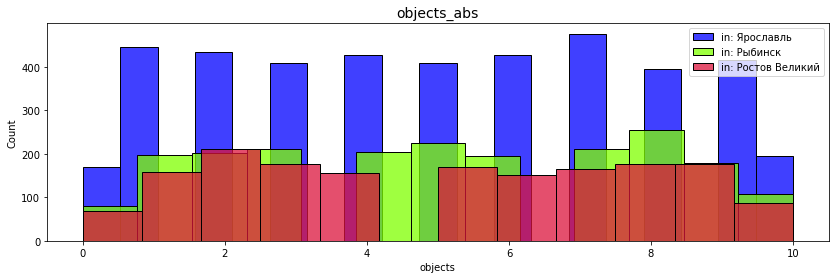

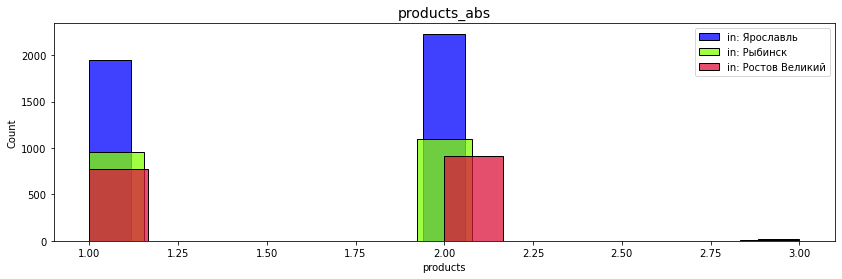

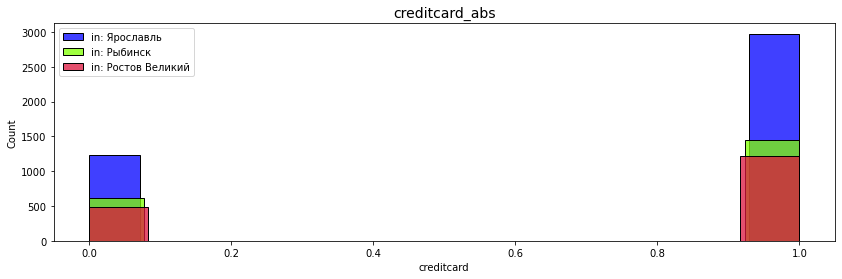

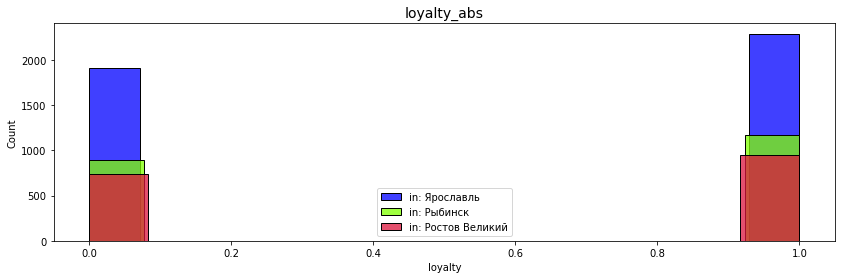

In [17]:
# Распределение оставшихся клиентов по параметрам в каждом городе (абсолютные величины)
for prop in ['gender', 'age', 'objects', 'products', 'creditcard', 'loyalty']:
        fig = plt.figure(figsize=(14,4))

        sns.histplot(dfc.query('churn == 0 & city == "Ярославль"')[prop], label='in: Ярославль', color="Blue")

        sns.histplot(dfc.query('churn == 0 & city == "Рыбинск"')[prop], label='in: Рыбинск', color="Chartreuse")

        sns.histplot(dfc.query('churn == 0 & city == "Ростов Великий"')[prop], label='in: Ростов Великий', color="Crimson")
        plt.title(prop+'_abs', fontsize=14)
        plt.legend()
        plt.show()

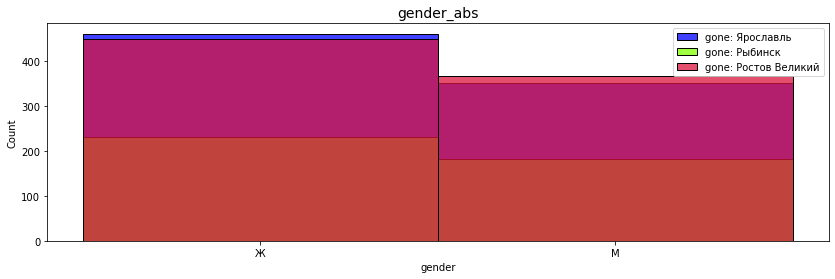

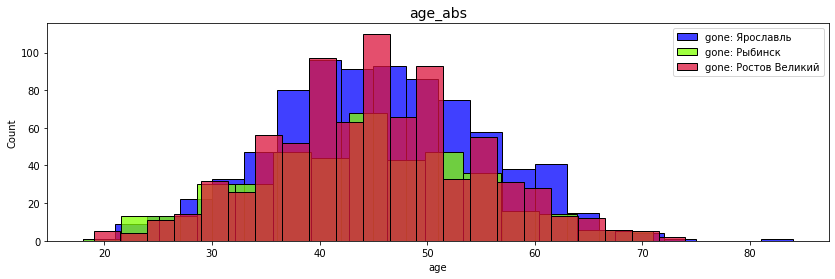

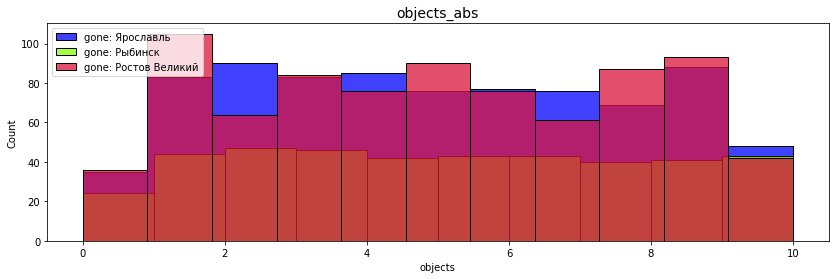

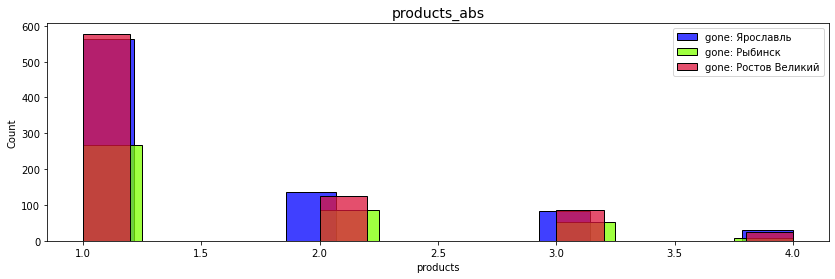

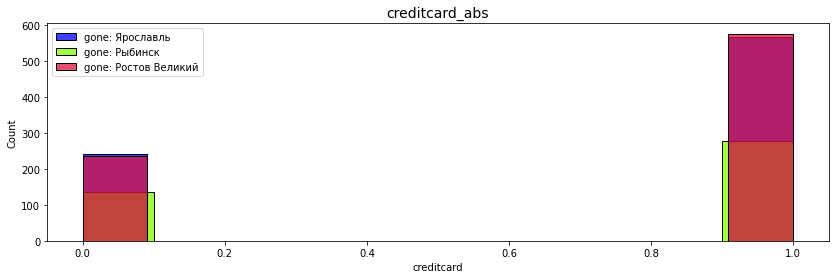

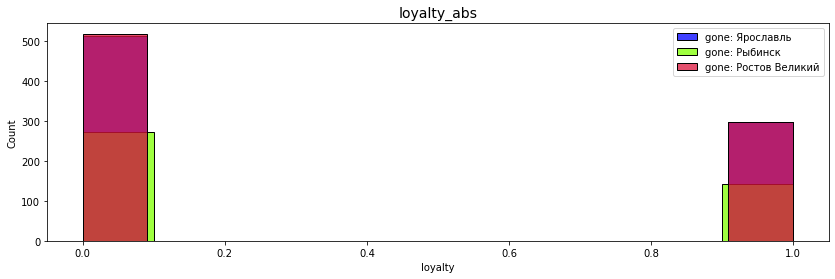

In [18]:
# Распределение ушедших клиентов по параметрам в каждом городе (абсолютные величины)
for prop in ['gender', 'age', 'objects', 'products', 'creditcard', 'loyalty']:
        fig = plt.figure(figsize=(14,4))
        sns.histplot(dfc.query('churn == 1 & city == "Ярославль"')[prop], label='gone: Ярославль', color="Blue")

        sns.histplot(dfc.query('churn == 1 & city == "Рыбинск"')[prop], label='gone: Рыбинск', color="Chartreuse")

        sns.histplot(dfc.query('churn == 1 & city == "Ростов Великий"')[prop], label='gone: Ростов Великий', color="Crimson")

        plt.title(prop+'_abs', fontsize=14)
        plt.legend()
        plt.show()

#### **Вывод**
**Отток в общем(%):**
* В Ростове Великом отток приблизительно в 2 раза выше, чем в Рыбинске и Ярославле (порядка 0,32 против 0,16)
* Мужчины уходят чаще женщин (0,25 против 0,16)
* Возраст самых «утекающих» клиентов – 18 лет (более 70%). Распределение имеет ниспадающий характер (чем старше клиент, тем меньше доля оттока). Менее 10% оттока имеет категория клиентов старше 57 лет
* Клиенты с кол-вом обхектов 7 и менее уходят с показателем 20%-23%. Меньше всего уходят клиенты с десятью объектами – 17%
* Клиенты с одним продуктом пользования уходят все. С двумя – порядка 81%, с тремя – около 27% и с одним – порядка 8%
* Наличие кредитной карты влияет мало. С ней уходят около 21%, без нее – чуть более 20%
* Лояльные клиенты уходят меньше чем нелояльные: 27% против 14%

**Отток по городам(%):**
* Оба пола клиентов в Ростове Великом уходят чаще чем в других городах (женщины – 38% против 21%, мужчины 28% против 13%)
* В основном Ростов Великий опережает остальные города по всем возрастам клиентов в оттоке, кроме клиентов 18-ти и 19-ти лет. Разрыв нивелируется для клиентов старше 72 лет
* Также Ростов Великий опережает другие города в разрезе кол-ва объектов
* Для продуктов пользования в оттоке также лидирует Ростов Великий с максимальным отрывом для 3-х продуктов с уровнями порядка 41% против 21%
* Такая же картина и для наличия у клиентов кредитных карт (около 32,5%  у Ростова Великого против порядка 17,5% у остальных)
* Нелояльные клиенты в Ростове Великом уходят в доле около 41% против 24% у остальных, тогда как лояльные с долей 24% у Ростова Великого против порядка 12% у остальных

**Разрез оттока по параметрам (абсолютные величины):**
* Расположение ушедших и оставшихся клиентов в соответствии со скорингом не смещены
* Кол-во ушедших клиентов максимально в возрасте 30-42 лет, оставшихся – в возрасте 42 – 50 лет
* Кол-во объектов отдельно мало влияют на отток
* Для баланса ушедшие и оставшиеся клиенты имеют максимальное распределение в отрезке порядка 70,000р – 170,000р
* В продуктовом разрезе клиенты с одним и двумя продуктами превалируют над другими, однако с одним продуктом уходят чаще, чем с двумя
* Кол-во ушедших клиентов с кредитными картами больше, чем без них (около 5300vs.1500), как клиентов без них (около700vs.700)
* Похожая картина в разрезе лояльности
* Ушедшие клиенты находятся в разрезе ЗП на всем промежутке на уровне 360-420 клиентов, оставшиеся – на уровне ~150

**Разрез оставшихся клиентов по параметрам по городам (абсолютные величины):**
* Остающихся клиентов в разрезе пола больше в Ярославле, далее – Рыбинск, далее – Ростов Великий
* Такая же картина по возрасту, продукту, кредитным картам и лояльности

**Разрез ушедших клиентов по параметрам по городам (абсолютные величины):**
* Во всех городах мужчины уходят реже женщин
* Ярославль и Ростов великий соперничают за первое место в разрезе возраста на промежутке 30-65 лет
* В разрезе объектов отток в городах приблизительно равно пропорционален
* По кол-ву продуктов выделяются Ярославль и Ростов Великий для пользователей с одним продуктом в кол-ве до 600 клиентов. Рыбинск отстает на уровне порядка 260 клиентов
* В разрезе кредитных карт Ярославль и Ростов Великий лидируют для пользователей с кредитной картой на уровне порядка 570 человек против Рыбинска (порядка 290). Без кредитных карт картина та же(порядка 250 чел у лидеров против Рыбинска на уровне порядка 120)
* Для разреза лояльности картина городов-лидеров и отстающих такая же




### Матрица корреляции

Для общего датасета

In [19]:
# так как признаки, выраженные категориальными переменными, не коррелируются, переведем их в числовые значение

df_dum = pd.get_dummies(df.drop('userid', axis=1))
df_dum.head()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


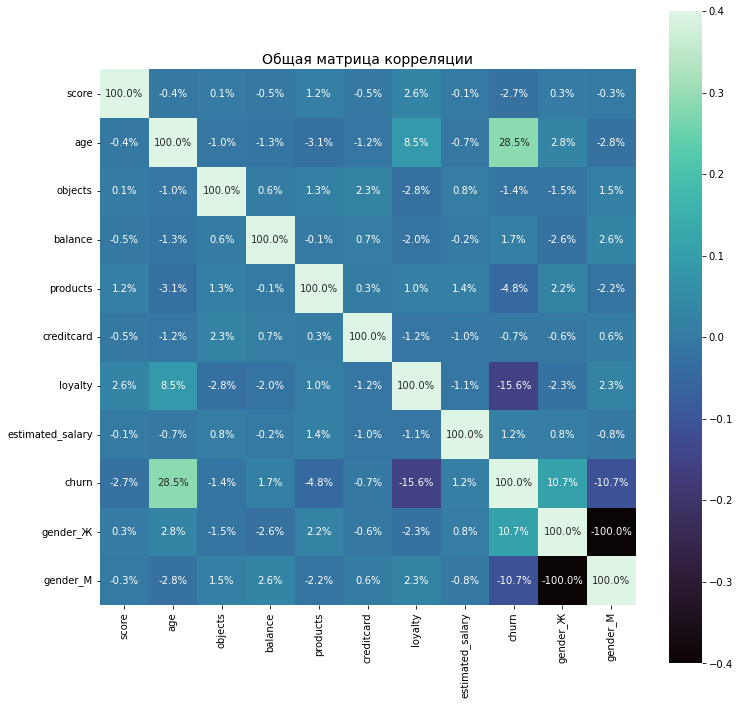

In [20]:
fig = plt.subplots(figsize = (12,12))
sns.color_palette("tab10")
df_dum = df_dum.rename(columns = {'city_Ростов Великий':'city_Ростов_Великий'})


# для общего сета города нас не интересуют, поэтому удалим их при формировании тепловой карты корреляции
# в то время как пол может иметь значение. оставим его
sns.heatmap(df_dum.drop(columns = (['city_Ростов_Великий', 'city_Рыбинск', 'city_Ярославль']), axis=1).\
            corr(), annot = True, square = True, cmap="mako", fmt='.1%', vmin=-0.4, vmax=0.4, center= 0)
plt.title("Общая матрица корреляции", fontsize=14)
plt.show()

**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

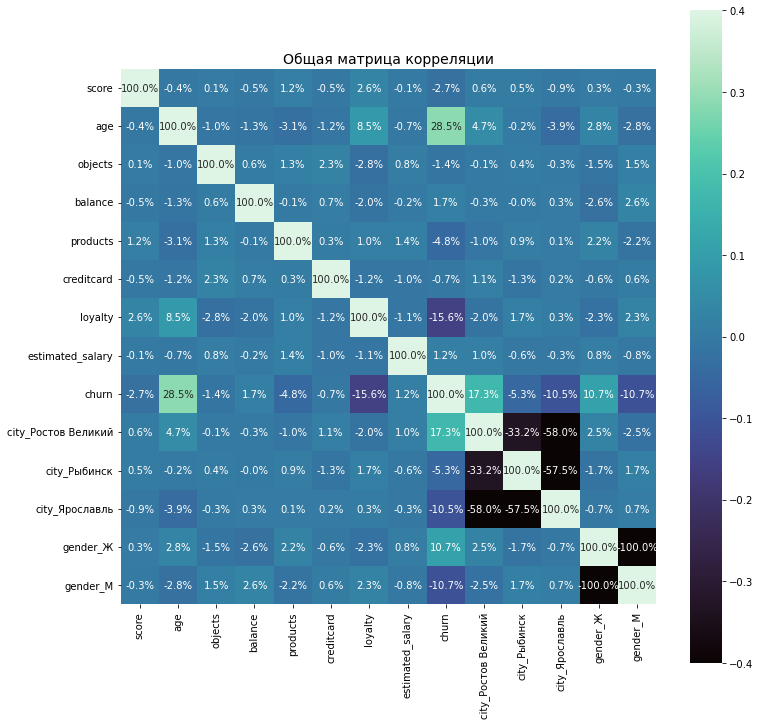

In [21]:
fig = plt.subplots(figsize = (12,12))
sns.color_palette("tab10")
df_ = pd.get_dummies(df.drop('userid', axis=1))
sns.heatmap(df_.\
            corr(), annot = True, square = True, cmap="mako", fmt='.1%', vmin=-0.4, vmax=0.4, center= 0)
plt.title("Общая матрица корреляции", fontsize=14)
plt.show()

Рассматривать корреляционное взаимодействие названий городов смысла как такогого не имеет. Остальные параметры коррелируют таким же образом: от очень слабого до слабого уровня корреляции

**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

Для каждого из городов

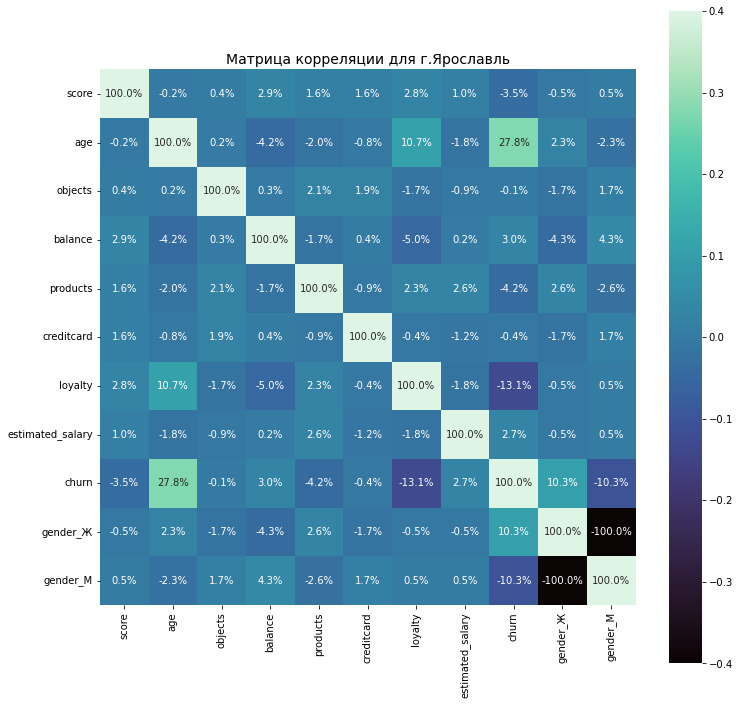

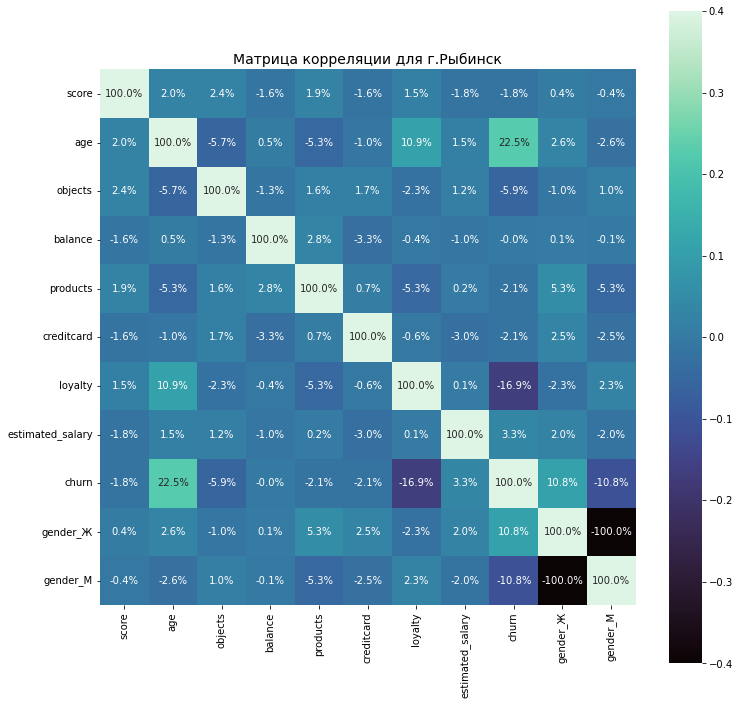

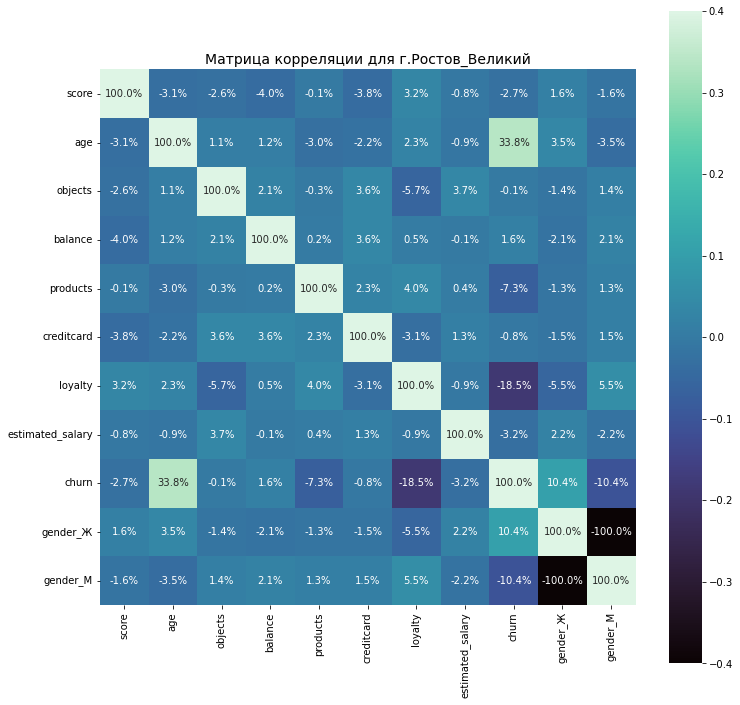

In [30]:
cities = ['city_Ростов_Великий', 'city_Рыбинск', 'city_Ярославль']
list_city = list(combinations(cities, 2))

for pair in list_city:

    cities = ['city_Ростов_Великий', 'city_Рыбинск', 'city_Ярославль']
    df_ = pd.get_dummies(df.drop('userid', axis=1))
    df_ = df_.rename(columns = {'city_Ростов Великий':'city_Ростов_Великий'})
    
    for i in range(0,2):
        df_ = df_.drop(pair[i], axis=1)
    for i in pair:
        if i in cities:
            cities.remove(i)
        
    df_1 = df_.query(f'{cities[0]} == {1}', engine='python')
    df_1.drop(cities, axis=1, inplace=True)
    
    fig = plt.subplots(figsize = (12,12))
    sns.color_palette("tab10")
    sns.heatmap(df_1.corr(), annot = True, square = True, cmap="mako", fmt ='.1%', vmin=-0.4, vmax=0.4, center= 0)
    plt.title(f'Матрица корреляции для г.{cities[0][5:]}', fontsize=14)
    plt.show()

***Шкала Чеддока***

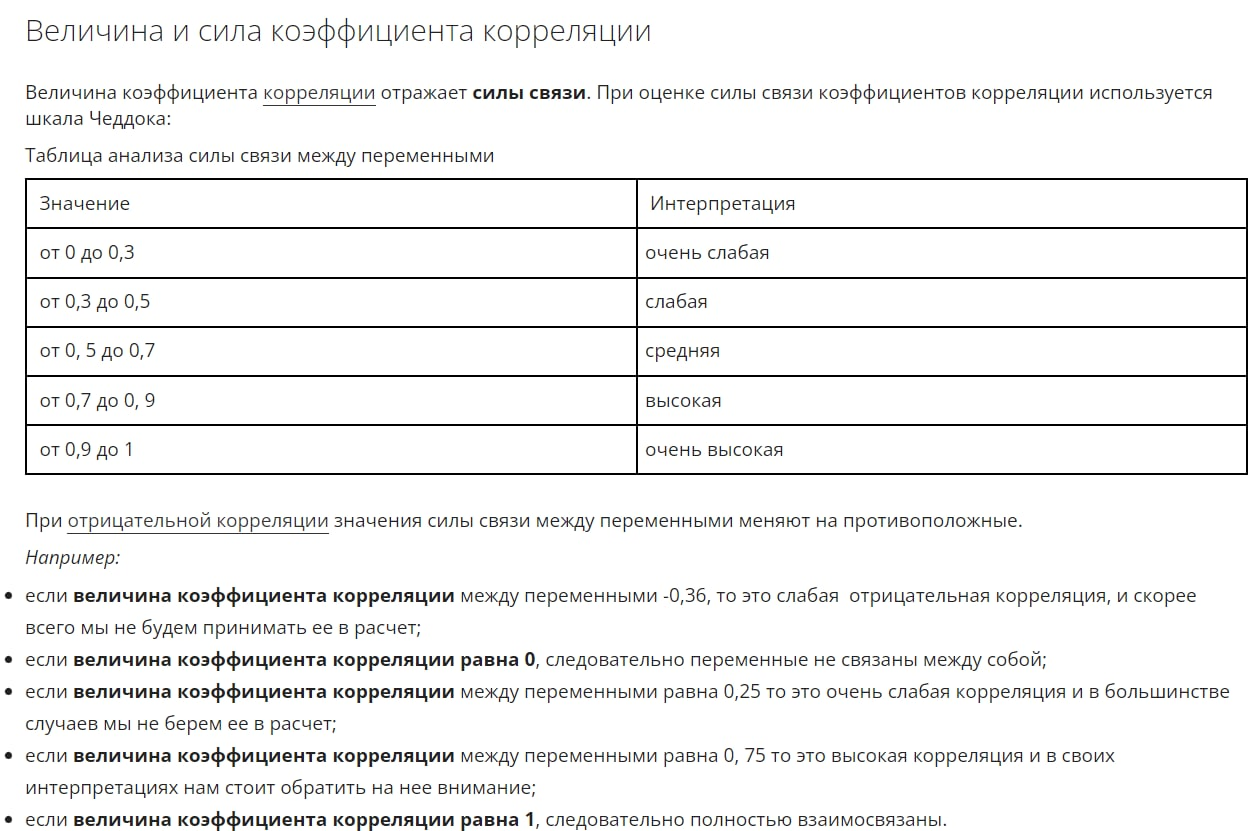

ресурс: https://yandex.ru/search/?lr=213&text=%D1%88%D0%BA%D0%B0%D0%BB%D0%B0+%D1%87%D0%B5%D0%B4%D0%B4%D0%BE%D0%BA%D0%B0+%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82+%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8&src=suggest_B

#### **Вывод**

**Общая матрица корреляции**
* Все параметры характеризуются очень слабой или слабой зависимостью

**Матрица корреляции по городам**
* Только в Ростове Великом отток слабо коррелирует с возрастом. Все остальные параметры коррелирует очень слабо, как и во всех остальных городах


## Кластеризация

In [31]:
df.isna().sum()

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [32]:
df_dum = pd.get_dummies(df.drop('userid', axis=1).dropna())
dfc.head()

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [33]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(df_dum) 

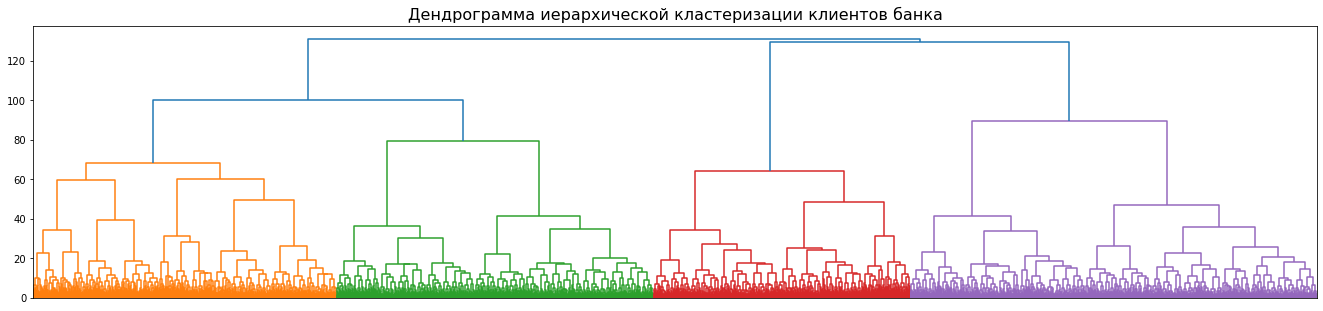

In [34]:
linked = linkage(X_sc, method = 'ward')   #матрица расстояний
plt.figure(figsize=(23, 5))  
dendrogram(linked, orientation='top', no_labels=True)   # дендрограмма с таблицей связок между объектами
plt.title('Дендрограмма иерархической кластеризации клиентов банка', size=16)
plt.show() 

* Далее приведены два варинта кластеризации для 6 и 8 кластеров. Методом простейшего подбора был произведен поиск кол-ва кластеров, для которых отток был бы близок (или в лучшем случае равен) граничным значениям `[0, 1]`, а также имелась бы возможность оценить продуктовое разделение по кластерам
* К сожалению увелечиние числа кластеров ведет к уменьшению их веса (влияния), даже при четко граничной выраженности признаков.
* Четкого продуктового разделения модель не показала, в отличии от разделения по оттоку

In [35]:
ro = KMeans(n_clusters = 6, random_state=0)     # модель k_means с количеством кластеров 8
cluster_number = ro.fit_predict(X_sc)           # разбиение на кластеры в пределах [0; 5]
df_dum['cluster'] = cluster_number               # сохранение метки кластера в поле датасета
df_mean = df_dum.groupby('cluster').mean().T
df_mean

cluster,0,1,2,3,4,5
score,653.693733,649.665877,651.507212,647.000000,652.262861,649.123989
age,39.910856,39.218799,39.174679,44.691176,38.467935,38.397125
objects,4.980583,5.028436,4.983173,5.284314,4.995772,4.842767
balance,119088.667070,120121.679186,119623.581122,120155.231667,121303.398591,118531.867152
products,1.420124,1.461295,1.258013,3.225490,1.234672,1.265049
creditcard,0.706090,0.718799,0.681891,0.710784,0.699789,0.686433
loyalty,0.473080,0.526856,0.552083,0.392157,0.515856,0.515723
estimated_salary,102222.081192,100040.338973,100086.610962,104802.287696,100898.662171,99683.035040
churn,0.342454,0.249605,0.176282,1.000000,0.130374,0.201258
city_Ростов Великий,1.000000,1.000000,0.000000,0.539216,0.000000,0.000000


In [36]:
for i in df_dum.cluster.unique():
    length = len(df_dum.query(f'cluster == @i', engine='python'))
    print(f'Кол-во значений в кластере {i}:', length, '|', round(length / len(df_dum)*100), '%')

Кол-во значений в кластере 2: 1248 | 20 %
Кол-во значений в кластере 3: 204 | 3 %
Кол-во значений в кластере 4: 1419 | 22 %
Кол-во значений в кластере 1: 1266 | 20 %
Кол-во значений в кластере 0: 1133 | 18 %
Кол-во значений в кластере 5: 1113 | 17 %


Кластер №3, хотя и имеет граничный показатель оттока, но очень незначителен по количеству.

In [37]:
ro = KMeans(n_clusters = 8, random_state=0)     # модель k_means с количеством кластеров 8
cluster_number = ro.fit_predict(X_sc)           # разбиение на кластеры в пределах [0; 7]
df_dum['cluster'] = cluster_number               # сохранение метки кластера в поле датасета
df_mean = df_dum.groupby('cluster').mean().T
df_mean

cluster,0,1,2,3,4,5,6,7
score,649.233507,652.260733,654.332440,655.697174,650.025886,648.554922,647.841584,652.323529
age,38.693576,37.256545,37.321716,39.814266,39.058583,37.202568,45.006188,39.534926
objects,4.863715,5.108901,4.894102,4.890983,4.971390,5.149786,5.000000,4.998162
balance,118393.712873,119977.007550,118872.579960,118772.621467,119800.726485,123673.130542,120230.042723,119834.225680
products,1.335069,1.567539,1.540214,1.279946,1.275204,1.255350,1.444307,1.340074
creditcard,0.685764,0.723560,0.706434,0.695828,0.671662,0.707561,0.709158,0.691176
loyalty,0.510417,0.589529,0.529491,1.000000,0.559946,0.000000,0.358911,0.529412
estimated_salary,99775.612812,101138.748859,104075.717359,100713.324441,99093.356117,101927.366534,98348.537574,101522.319669
churn,0.228299,0.005236,0.001340,0.098250,0.152589,0.195435,1.000000,0.253676
city_Ростов Великий,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [38]:
for i in df_dum.cluster.unique():
    length = len(df_dum.query(f'cluster == @i', engine='python'))
    print(f'Кол-во значений в кластере {i}:', length, '|', round(length / len(df_dum)*100), '%')

Кол-во значений в кластере 7: 544 | 9 %
Кол-во значений в кластере 0: 1152 | 18 %
Кол-во значений в кластере 4: 734 | 11 %
Кол-во значений в кластере 6: 808 | 13 %
Кол-во значений в кластере 3: 743 | 12 %
Кол-во значений в кластере 5: 701 | 11 %
Кол-во значений в кластере 1: 955 | 15 %
Кол-во значений в кластере 2: 746 | 12 %


### **Вывод**

**Кластеризация**
* Модель кластеризации показала граничное значение оттока с близким к среднему весом по кол-ву клиентов при кол-ве кластеров 8, но не показала граничного значения продуктов использования вплоть до 8 кластеров
* Заметных различий признаков среди клиентов банка не выявлено


## Сегментация по кол-ву используемых продуктов

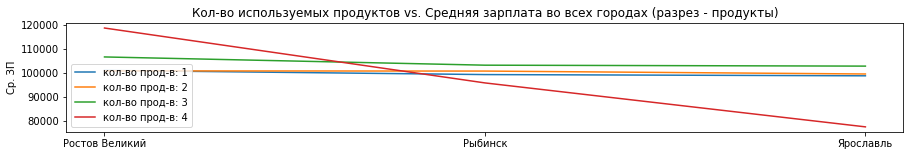

In [39]:
dfc = df.drop('userid', axis=1)
for prod in set(dfc.products.unique()):
    df_ = dfc.query(f'products == {prod}')
    df_1 = df_.groupby('city').estimated_salary.mean()
    df_1 = df_1.to_frame()
    plt.rcParams["figure.figsize"] = (15, 2)
    plt.plot(df_1.index, df_1.sort_values('estimated_salary', ascending=False).estimated_salary, label=f'кол-во прод-в: {prod}')
    plt.xticks(rotation=0) 
    plt.ylabel('Ср. ЗП')
    plt.title(f'Кол-во используемых продуктов vs. Средняя зарплата во всех городах (разрез - продукты)')
    plt.legend()
    plt.grid()

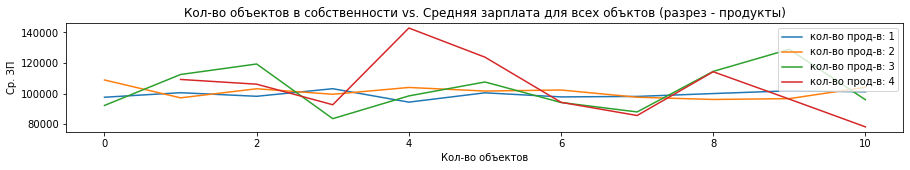

In [40]:
dfc = df.drop('userid', axis=1)
for prod in set(dfc.products.unique()):
    df_ = dfc.query(f'products == {prod}')
    df_1 = df_.groupby('objects').estimated_salary.mean()
    df_1 = df_1.to_frame()
    plt.rcParams["figure.figsize"] = (15, 2)
    plt.plot(df_1.index, df_1.sort_values('objects', ascending=False).estimated_salary, label=f'кол-во прод-в: {prod}')
    plt.xticks(rotation=0) 
    plt.xlabel('Кол-во объектов')
    plt.ylabel('Ср. ЗП')
    plt.title(f'Кол-во объектов в собственности vs. Средняя зарплата для всех объктов (разрез - продукты)')
    plt.legend()
    plt.grid()

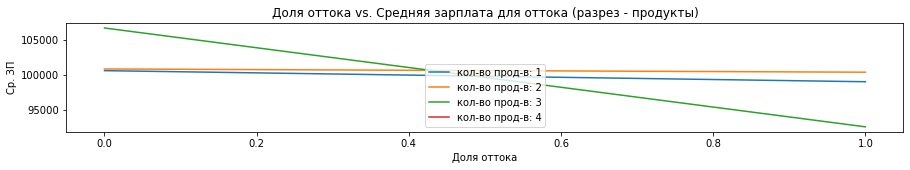

In [41]:
dfc = df.drop('userid', axis=1)
for prod in set(dfc.products.unique()):
    df_ = dfc.query(f'products == {prod}')
    df_1 = df_.groupby('churn').estimated_salary.mean()
    df_1 = df_1.to_frame()
    plt.rcParams["figure.figsize"] = (15, 2)
    plt.plot(df_1.index, df_1.sort_values('churn', ascending=False).estimated_salary, label=f'кол-во прод-в: {prod}')
    plt.xticks(rotation=0) 
    plt.xlabel('Доля оттока')
    plt.ylabel('Ср. ЗП')
    plt.title(f'Доля оттока vs. Средняя зарплата для оттока (разрез - продукты)')
    plt.legend()

    plt.grid()

### **Выводы**

**Ср.ЗП и города (разрез - продукты):**
* Для клиентов с продуктами от 1-го до 3-х во всех городах свойственна приблизительно одинаковая ЗП по среднему (около 102.000 – 107.000р)
* Для клиентов с 4-мя продуктами имеется разница: в Ростове Великом ср.ЗП на уровне порядка 120.000р., в Рыбинске – около 97.000р., в Ярославле – около 75.000р


**Ср.ЗП и кол-во объектов собственности (разрез - продукты):**
* В разрезе «объект» картина неоднородна: при владении объектов от 1-го до 3-х ср.ЗП находится для всех продуктов пользования в пределе 80.000 – 120.000р.
* При 4-х  и 5-ти объектах клиенты с 4-мя продуктами имеют ср.ЗП на уровне 140.000р и 120.000 соответственно, в то время как остальные – на уровне 100.000р.
* Для 6-ти и 7-и объектов ср.ЗП колеблется незначительно в пределах около 90.000-100.000р
* Для 8-ми объектов клиенты с 3-мя и 4-мя продуктами имеют ср.ЗП на уровне 110.000р. Для 1-го и 2-х продуктов – на уровне 100.000р
* Для 9-ти объектов клиенты с 1-им, 3-мя и 4-мя продуктами имеют ср.ЗП на уровне порядка 100.000р., в то время как клиенты  с 2-мя продуктами – на уровне порядка 130.000р
* Для 10-ти объектов клиенты с 1-м, 2-мя и 3-мя продуктами имеют ср.ЗП на уровне около 100.00р., а вот с 4-мя – на более низком уровне порядка 80.000


**Ср.ЗП и отток (разрез - продукты):**
* Клиенты с 1-м, 2-мя и 4-мя продуктами имеют одинаковый ср.ЗП на уровне 100.000р. для обоих показателей оттока
* Клиенты с 3-мя продуктами остаются чаще при ср.ЗП на уровне 150.000р. и уходят чаще при более низком уровне ср.ЗП в 95.000р.


## Выдвижение и проверка гипотезы

Рассмотрим гипотезу о равенстве средних значений оцениваемого дохода для клиентов, пользующихся одним и двумя банковскими продуктами для всех городов

**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

In [42]:
s1 = df.query('products == 1').estimated_salary
s2 = df.query('products == 2').estimated_salary
for s in [s1, s2]:
    stat, p = shapiro(s)
    alpha = 0.05
    if p > alpha:
        print('Распределение СКОРЕЕ НОРМАЛЬНО, не стоит отвергать гипотезу Н0, p = ', p)
    else:
        print('Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p = ', p)

Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p =  3.017243029368968e-36
Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p =  2.1702722294315505e-35


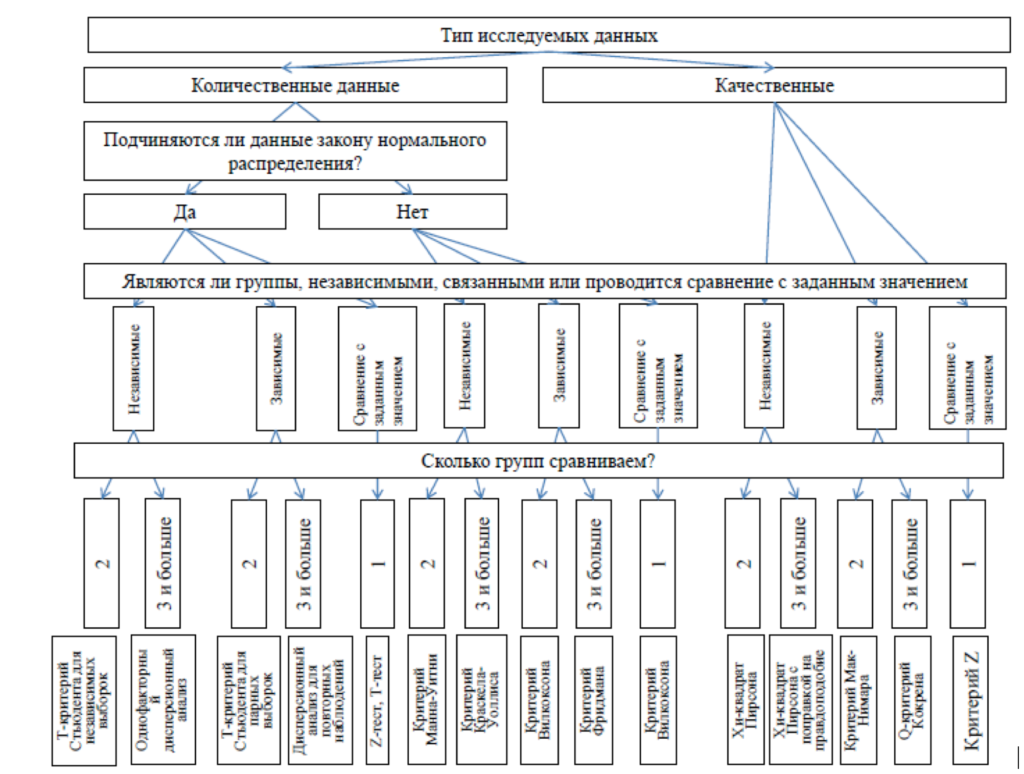

<div class="alert alert-block alert-info">

ресурс: https://lit-review.ru/biostatistika/vybor-statisticheskogo-kriteriya/    
    
в соответствии с ненормальностью распределения данных в выборках, сравнения двух выборок и независимости переменных, будет испльзован критерий Манна-Уитни

</div>        

* рассмотрим гипотезу Н0, которая будет говорить скорее о равенстве среднего дохода
* Н1 будет утверждать то, средние доходы клиентов из выборок скорее отличаются
* уровень значимости = 0,05

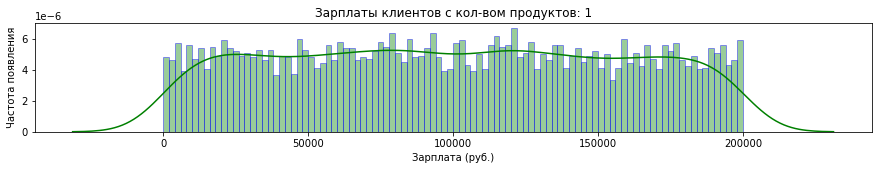

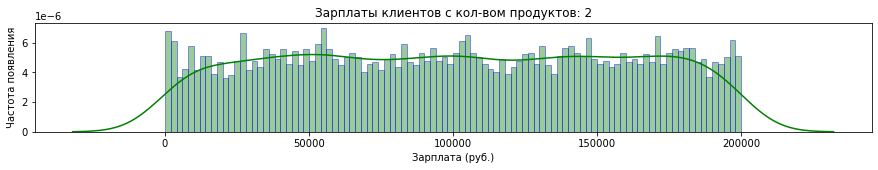

In [43]:
# графическое отображение распределение величин

for i in (1, 2):
    sns.distplot(df.query(f'products == @i').estimated_salary, hist=True, \
        bins=100, color = 'green', hist_kws={'edgecolor':'blue'}).\
        set_title(f'Зарплаты клиентов с кол-вом продуктов: {i}')

    plt.xlabel("Зарплата (руб.)") 
    plt.ylabel("Частота появления"); 
    plt.show()

Исходя из того, значения выборок независимы , используем тест Манна-Уитни:

In [44]:
print('Дисперсия для одного продукта', round(np.var(s1, ddof=1)))
print('Дисперсия для двух продуктов', round(np.var(s2, ddof=1)))

alpha = 0.05

result = st.mannwhitneyu(s1, s2)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Вероятность равна ", round(result.pvalue, 3))
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вероятность равна ", round(result.pvalue, 3))

Дисперсия для одного продукта 3290585635
Дисперсия для двух продуктов 3339776563
Не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.408


Теперь рассмотрим гипотезу о равенстве средних значений оцениваемого дохода для клиентов для присутствующих в файле городах попарно:
* рассмотрим гипотезу Н0, которая будет говорить скорее о равенстве среднего дохода
* Н1 будет утверждать то, средние доходы клиентов из выборок скорее отличаются
* уровень значимости = 0,05

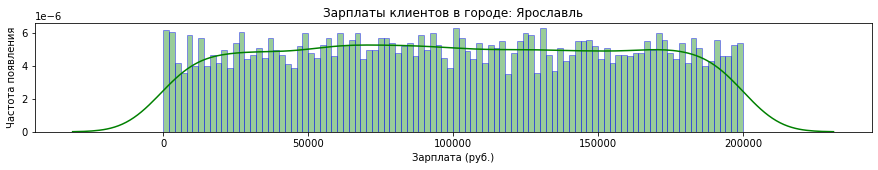

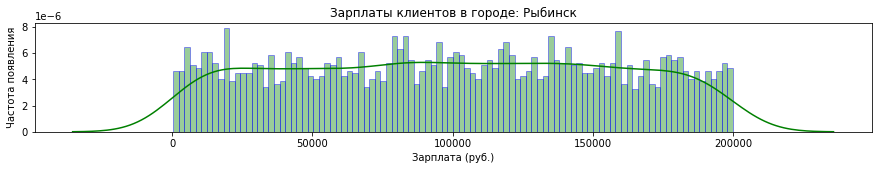

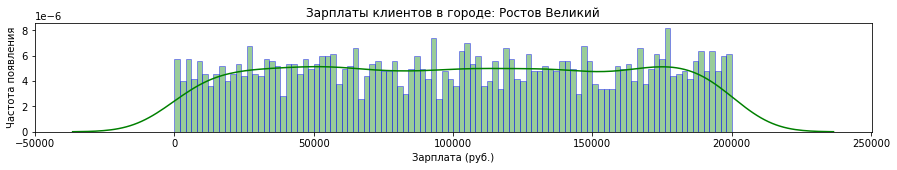

In [45]:
# графическое отображение распределение величин
for i in (df.city.unique()):
    sns.distplot(df.query(f'city == @i').estimated_salary, hist=True, \
        bins=100, color = 'green', hist_kws={'edgecolor':'blue'}).\
        set_title(f'Зарплаты клиентов в городе: {i}')

    plt.xlabel("Зарплата (руб.)") 
    plt.ylabel("Частота появления"); 
    plt.show()

In [46]:
s1 = df.query('products == 1').estimated_salary
s2 = df.query('products == 2').estimated_salary
for s in [s1, s2]:
    stat, p = shapiro(s)
    alpha = 0.05
    if p > alpha:
        print('Распределение СКОРЕЕ НОРМАЛЬНО, не стоит отвергать гипотезу Н0, p = ', p)
    else:
        print('Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p = ', p)

Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p =  3.017243029368968e-36
Распределение СКОРЕЕ НЕНОРМАЛЬНО, стоит отвергнуть гипотезу Н0 и принять Н1, p =  2.1702722294315505e-35


Исходя из того, значения выборок независимы , используем тест Манна-Уитни:

In [47]:
for i in list(combinations(df.city.unique(), 2)):
    for j in range(0,1):
        s1 = df[df['city'] == i[j]].estimated_salary
        s2 = df[df['city'] == i[j+1]].estimated_salary
        
        print(f'Для г.{i[j]} дисперсия равна', round(np.var(s1, ddof=1)))
        print(f'Для г.{i[j+1]} дисперсия равна', round(np.var(s2, ddof=1)))
        alpha = 0.05

        result = st.mannwhitneyu(s1, s2)
        if result.pvalue < alpha:
            print(f'Для городов {i[j]} и {i[j+1]} отвергаем нулевую гипотезу. Вероятность равна ', round(result.pvalue, 3), end='\n\n')
        else:
            print(f'Для городов {i[j]} и {i[j+1]} не получилось отвергнуть нулевую гипотезу. Вероятность равна ', round(result.pvalue, 3), end='\n\n')

Для г.Ярославль дисперсия равна 3287450038
Для г.Рыбинск дисперсия равна 3260830052
Для городов Ярославль и Рыбинск не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.758

Для г.Ярославль дисперсия равна 3287450038
Для г.Ростов Великий дисперсия равна 3394578509
Для городов Ярославль и Ростов Великий не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.396

Для г.Рыбинск дисперсия равна 3260830052
Для г.Ростов Великий дисперсия равна 3394578509
Для городов Рыбинск и Ростов Великий не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.31



а как со всеми комбинациями продуктов пользования?

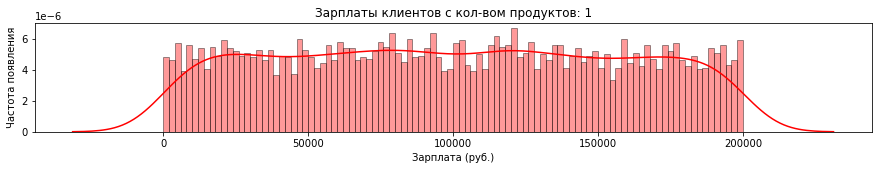

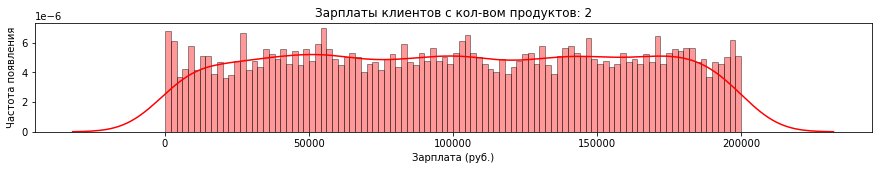

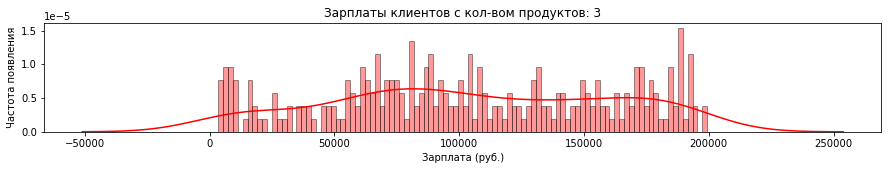

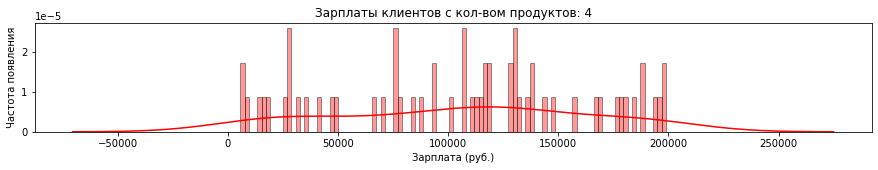

In [48]:
for i in range(1, len(df.products.unique())+1):
    sns.distplot(df.query(f'products == {i}').estimated_salary, hist=True, \
        bins=100, color = 'red', hist_kws={'edgecolor':'black'}).\
        set_title(f'Зарплаты клиентов с кол-вом продуктов: {i}')

    plt.xlabel("Зарплата (руб.)") 
    plt.ylabel("Частота появления"); 
    plt.show()

Исходя из того, значения выборок независимы , используем тест Манна-Уитни:

In [49]:
for i in list(combinations(df.products.unique(), 2)):
    for j in range(0,1):
        s1 = df[df['products'] == i[j]].estimated_salary
        s2 = df[df['products'] == i[j+1]].estimated_salary
        
        print(f'При кол-ве продуктов {i[j]} дисперсия равна', round(np.var(s1, ddof=1)))
        print(f'При кол-ве продуктов {i[j+1]} дисперсия равна', round(np.var(s2, ddof=1)))
        alpha = 0.05

        result = st.mannwhitneyu(s1, s2)
        if result.pvalue < alpha:
            print(f'Для кол-ва продуктов {i[j]} и {i[j+1]} отвергаем нулевую гипотезу. Вероятность равна ', round(result.pvalue, 3), end='\n\n')
        else:
            print(f'Для кол-ва продуктов {i[j]} и {i[j+1]} не получилось отвергнуть нулевую гипотезу. Вероятность равна ', round(result.pvalue, 3), end='\n\n')

При кол-ве продуктов 1 дисперсия равна 3290585635
При кол-ве продуктов 3 дисперсия равна 3076286514
Для кол-ва продуктов 1 и 3 не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.185

При кол-ве продуктов 1 дисперсия равна 3290585635
При кол-ве продуктов 2 дисперсия равна 3339776563
Для кол-ва продуктов 1 и 2 не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.408

При кол-ве продуктов 1 дисперсия равна 3290585635
При кол-ве продуктов 4 дисперсия равна 3309297525
Для кол-ва продуктов 1 и 4 не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.473

При кол-ве продуктов 3 дисперсия равна 3076286514
При кол-ве продуктов 2 дисперсия равна 3339776563
Для кол-ва продуктов 3 и 2 не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.279

При кол-ве продуктов 3 дисперсия равна 3076286514
При кол-ве продуктов 4 дисперсия равна 3309297525
Для кол-ва продуктов 3 и 4 не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.84

При кол-ве продуктов 

### **Вывод**

**Сравнение среднего дохода по группам**
* Клиентов, пользующихся 1-м и 2-мя продуктов: стат.значимого различия не выявлено
* Клиентов, живущих в разных городах: попарное сравнение групп клиентов в разных городах стат.значимого различия не выявило
* Клиентов, пользующихся разными по кол-ву наборов продуктов: попарное сравнение клиентов различия не выявило


## **Итоговый вывод**

**данные**
* Данные представлены в одном файле
* Данные заполнены все на 100%, кроме колонки "баланс счета". В данной колонке отсутствуют записи в кол-ве 3617, что составляет 36,17%, то есть уровень заполненности составляет 63,83%
* Дубликаты отсутствуют
* Названия колонок преобразованы в соответствии с требованиями ***snake_style***
* В данных присутсвуют признаки в кол-ве 12 в виде целых и действительных чисел, а также в виде строковых переменных

**предобработка**
* Среднее и медиана `скоринга для неизвестных балансов` находятся довольно близко: 649 и 651 соответственно
* Та же картина и для известных балансов: 651 и 652
* Как следствие, `общий сокринг` так же близок в среднем и медиане: 649 и 651 соответственно
* Среднее и медиана `кол-ва объектов` – 5, минимум – 0, максимум – 10
* Для `продуктов пользования` среднее – 2, медиана 1,78, минимум – 1, максимум – 4
* Для `оценочной зарплаты` среднее и медиана различаются немного и равны 98,618р и 98,983р соответственно. Минимум – 90р, максимум – 199992р




* Для того, чтобы не искажать показатели баланса, пропуски оставлены без изменения
* Распределение женщин и мужчин в категории отсутствующих данных о балансе отличается незначительно
* В Ростове Великом нет пропусков в балансе, в то время как в Ярославе их 2418 - более чем в два раза больше, чем в Рыбинске (1199)


**анализ**

**Отток в общем(%):**
* В Ростове Великом отток приблизительно в 2 раза выше, чем в Рыбинске и Ярославле (порядка 0,32 против 0,16)
* Мужчины уходят чаще женщин (0,25 против 0,16)
* Возраст самых «утекающих» клиентов – 18 лет (более 70%). Распределение имеет ниспадающий характер (чем старше клиент, тем меньше доля оттока). Менее 10% оттока имеет категория клиентов старше 57 лет
* Клиенты с кол-вом обхектов 7 и менее уходят с показателем 20%-23%. Меньше всего уходят клиенты с десятью объектами – 17%
* Клиенты с одним продуктом пользования уходят все. С двумя – порядка 81%, с тремя – около 27% и с одним – порядка 8%
* Наличие кредитной карты влияет мало. С ней уходят около 21%, без нее – чуть более 20%
* Лояльные клиенты уходят меньше чем нелояльные: 27% против 14%

**Отток по городам в связи с теми же параметрам(%):**
* Оба пола клиентов в Ростове Великом уходят чаще чем в других городах (женщины – 38% против 21%, мужчины 28% против 13%)
* В основном Ростов Великий опережает остальные города по всем возрастам клиентов в оттоке, кроме клиентов 18-ти и 19-ти лет. Разрыв нивелируется для клиентов старше 72 лет
* Также Ростов Великий опережает другие города в разрезе кол-ва объектов
* Для продуктов пользования в оттоке также лидирует Ростов Великий с максимальным отрывом для 3-х продуктов с уровнями порядка 41% против 21%
* Такая же картина и для наличия у клиентов кредитных карт (около 32,5%  у Ростова Великого против порядка 17,5% у остальных)
* Нелояльные клиенты в Ростове Великом уходят в доле около 41% против 24% у остальных, тогда как лояльные с долей 24% у Ростова Великого против порядка 12% у остальных

**Разрез оттока по параметрам (абсолютные величины):**
* Расположение ушедших и оставшихся клиентов в соответствии со скорингом не смещены
* Кол-во ушедших клиентов максимально в возрасте 30-42 лет, оставшихся – в возрасте 42 – 50 лет
* Кол-во объектов отдельно мало влияют на отток
* Для баланса ушедшие и оставшиеся клиенты имеют максимальное распределение в отрезке порядка 70,000р – 170,000р
* В продуктовом разрезе клиенты с одним и двумя продуктами превалируют над другими, однако с одним продуктом уходят чаще, чем с двумя
* Кол-во ушедших клиентов с кредитными картами больше, чем без них (около 5300vs.1500), как клиентов без них (около700vs.700)
* Похожая картина в разрезе лояльности
* Ушедшие клиенты находятся в разрезе ЗП на всем промежутке на уровне 360-420 клиентов, оставшиеся – на уровне ~150

**Разрез оставшихся клиентов по параметрам по городам (абсолютные величины):**
* Остающихся клиентов в разрезе пола больше в Ярославле, далее – Рыбинск, далее – Ростов Великий
* Такая же картина по возрасту, продукту, кредитным картам и лояльности

**Разрез ушедших клиентов по параметрам по городам (абсолютные величины):**
* Во всех городах мужчины уходят реже женщин
* Ярославль и Ростов великий соперничают за первое место в разрезе возраста на промежутке 30-65 лет
* В разрезе объектов отток в городах приблизительно равно пропорционален
* По кол-ву продуктов выделяются Ярославль и Ростов Великий для пользователей с одним продуктом в кол-ве до 600 клиентов. Рыбинск отстает на уровне порядка 260 клиентов
* В разрезе кредитных карт Ярославль и Ростов Великий лидируют для пользователей с кредитной картой на уровне порядка 570 человек против Рыбинска (порядка 290). Без кредитных карт картина та же(порядка 250 чел у лидеров против Рыбинска на уровне порядка 120)
* Для разреза лояльности картина городов-лидеров и отстающих такая же


**Общая матрица корреляции**
* Все параметры характеризуются очень слабой или слабой зависимостью

**Матрица корреляции по городам**
* Только в Ростове Великом отток слабо коррелирует с возрастом. Все остальные параметры коррелирует очень слабо, как и во всех остальных городах

**Кластеризация**
* Модель кластеризации показала граничное значение оттока с близким к среднему весом по кол-ву клиентов при кол-ве кластеров 8, но не показала граничного значения продуктов использования вплоть до 8 кластеров
* Заметных различий признаков  среди услуг банка не выявлено

**Ср.ЗП и города (разрез - продукты):**
* Для клиентов с продуктами от 1-го до 3-х во всех городах свойственна приблизительно одинаковая ЗП по среднему (около 102.000 – 107.000р)
* Для клиентов с 4-мя продуктами имеется разница: в Ростове Великом ср.ЗП на уровне порядка 120.000р., в Рыбинске – около 97.000р., в Ярославле – около 75.000р


**Ср.ЗП и кол-во объектов собственности (разрез - продукты):**
* В разрезе «объект» картина неоднородна: при владении объектов от 1-го до 3-х ср.ЗП находится для всех продуктов пользования в пределе 80.000 – 120.000р.
* При 4-х  и 5-ти объектах клиенты с 4-мя продуктами имеют ср.ЗП на уровне 140.000р и 120.000 соответственно, в то время как остальные – на уровне 100.000р.
* Для 6-ти и 7-и объектов ср.ЗП колеблется незначительно в пределах около 90.000-100.000р
* Для 8-ми объектов клиенты с 3-мя и 4-мя продуктами имеют ср.ЗП на уровне 110.000р. Для 1-го и 2-х продуктов – на уровне 100.000р
* Для 9-ти объектов клиенты с 1-им, 3-мя и 4-мя продуктами имеют ср.ЗП на уровне порядка 100.000р., в то время как клиенты  с 2-мя продуктами – на уровне порядка 130.000р
* Для 10-ти объектов клиенты с 1-м, 2-мя и 3-мя продуктами имеют ср.ЗП на уровне около 100.00р., а вот с 4-мя – на более низком уровне порядка 80.000


**Ср.ЗП и отток (разрез - продукты):**
* Клиенты с 1-м, 2-мя и 4-мя продуктами имеют одинаковый ср.ЗП на уровне 100.000р. для обоих показателей оттока
* Клиенты с 3-мя продуктами остаются чаще при ср.ЗП на уровне 150.000р. и уходят чаще при более низком уровне ср.ЗП в 95.000р.

**Сравнение среднего дохода по группам**
* Клиентов, пользующихся 1-м и 2-мя продуктов: стат.значимого различия не выявлено
* Клиентов, живущих в разных городах: попарное сравнение групп клиентов в разных городах стат.значимого различия не выявило
* Клиентов, пользующихся разными по кол-ву наборов продуктов: попарное сравнение клиентов различия не выявило



## **Рекомендации**

* Для всех городов актуально уменьшение оттока с увеличения возраста клиентов, в связи с чем необходимо скорректировать/разработать меры (внедрение новых продуктов, программы лояльности) для клиентов в возрасте 18-50 лет (особенно в Ростове Великом).
* Также для данной группы необходимо провести опрос клиентов об их удовлетворенности для понимания слабых мест сервиса банка
* Для удержания клиентов необходимо рекламировать пользоваться большим кол-вом продуктов и привлекать более состоятельных клиентов
